<a href="https://colab.research.google.com/github/tatchum237/dataScientist/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imporations des packages

In [98]:
# data analysis and wrengling
import numpy as np 
import random as rnd
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# processing
from sklearn.preprocessing import LabelEncoder



# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Importation des données

Le jeu de données ce trouve dans ce [google drive](https://drive.google.com/drive/folders/1rVOWpQVje9gk5LMPl1YRgsFg1oBq1wEY?usp=share_link). 

Ajouter le en raccourci de votre google drive.



In [99]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [100]:
test = pd.read_csv('/content/gdrive/MyDrive/test.csv')
train =  pd.read_csv('/content/gdrive/MyDrive/train.csv')
combine = [train, test]

# Analysez vos données

In [101]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
train.shape

(891, 12)

In [103]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [104]:
test.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [105]:
train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [106]:
test.shape

(418, 11)

In [107]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [110]:
train.info()
print('-' *40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [111]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [113]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [114]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [115]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


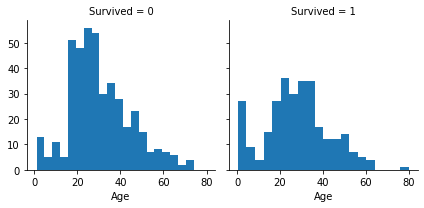

In [116]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


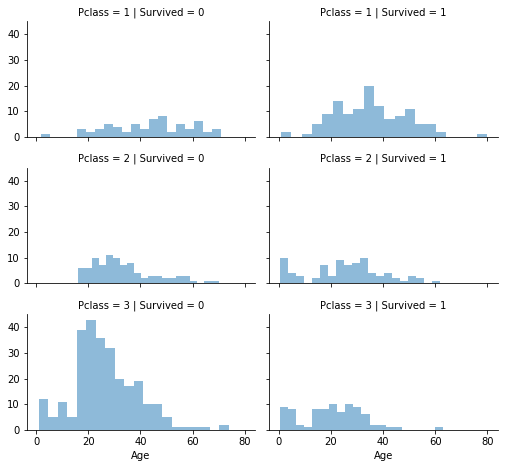

In [117]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


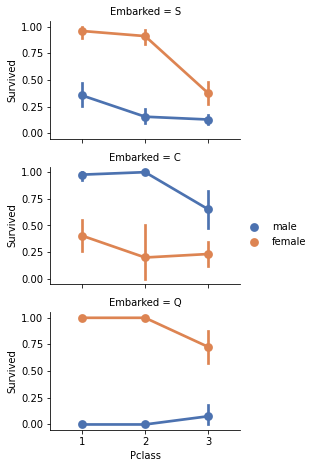

In [118]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [119]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [120]:
lbl = LabelEncoder()
train['Name_encoding'] = lbl.fit_transform(train.Name)
test['Name_encoding'] = lbl.fit_transform(test.Name)

In [121]:
train = train.drop(['Name', 'PassengerId'], axis = 1)
test = test.drop(['Name', 'PassengerId'], axis = 1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 8))

In [122]:
lbl = LabelEncoder()
train['Sex'] = lbl.fit_transform(train.Sex)
test['Sex'] = lbl.fit_transform(test.Sex)

In [123]:
lbl = LabelEncoder()
train['Embarked'] = lbl.fit_transform(train.Embarked)
test['Embarked'] = lbl.fit_transform(test.Embarked)

In [124]:
#for dataset in combine:
    #dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head(50)  # beaucoup de variables nulles

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_encoding
0,0,3,1,22.0,1,0,7.2500,2,108
1,1,1,0,38.0,1,0,71.2833,0,190
2,1,3,0,26.0,0,0,7.9250,2,353
3,1,1,0,35.0,1,0,53.1000,2,272
4,0,3,1,35.0,0,0,8.0500,2,15
5,0,3,1,NaN,0,0,8.4583,1,554
6,0,1,1,54.0,0,0,51.8625,2,515
7,0,3,1,2.0,3,1,21.0750,2,624
8,1,3,0,27.0,0,2,11.1333,2,412
9,1,2,0,14.0,1,0,30.0708,0,576


In [125]:
for col in train.columns:
  if train[col].isna().sum() != 0:
    train[col][train[col].isna()] = train[col].mean()
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
train.isna().sum()  # plus de valeurs NaN

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Name_encoding    0
dtype: int64

In [127]:
for col in test.columns:
  if test[col].isna().sum() != 0:
    test[col][test[col].isna()] = test[col].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Séparer le jeu de train et de test

In [128]:
x_train = train.drop("Survived", axis=1)
y_train = train['Survived']
x_test = test

x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [129]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_encoding
0,3,1,22.000000,1,0,7.2500,2,108
1,1,0,38.000000,1,0,71.2833,0,190
2,3,0,26.000000,0,0,7.9250,2,353
3,1,0,35.000000,1,0,53.1000,2,272
4,3,1,35.000000,0,0,8.0500,2,15
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,548
887,1,0,19.000000,0,0,30.0000,2,303
888,3,0,29.699118,1,2,23.4500,2,413
889,1,1,26.000000,0,0,30.0000,0,81


In [130]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [131]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_encoding
0,3,1,34.50000,0,0,7.8292,1,206
1,3,0,47.00000,1,0,7.0000,2,403
2,2,1,62.00000,0,0,9.6875,1,269
3,3,1,27.00000,0,0,8.6625,2,408
4,3,0,22.00000,1,1,12.2875,2,178
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,353
414,1,0,39.00000,0,0,108.9000,0,283
415,3,1,38.50000,0,0,7.2500,2,332
416,3,1,30.27259,0,0,8.0500,2,384


# Normaliser le jeu de données

In [132]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(x_train)

x_train_norm = std.transform(x_train)

x_test_norm = std.transform(x_test)


In [133]:
x_test_norm

array([[ 0.82737724,  0.73769513,  0.36944878, ..., -0.49078316,
        -0.67867322, -0.92920405],
       [ 0.82737724, -1.35557354,  1.33137817, ..., -0.50747884,
         0.58111394, -0.16329109],
       [-0.36936484,  0.73769513,  2.48569343, ..., -0.45336687,
        -0.67867322, -0.68426742],
       ...,
       [ 0.82737724,  0.73769513,  0.67726619, ..., -0.50244517,
         0.58111394, -0.43933078],
       [ 0.82737724,  0.73769513,  0.04413122, ..., -0.48633742,
         0.58111394, -0.23716087],
       [ 0.82737724,  0.73769513,  0.04413122, ..., -0.19824428,
        -1.93846038, -0.55596728]])

In [134]:
x_test_norm

array([[ 0.82737724,  0.73769513,  0.36944878, ..., -0.49078316,
        -0.67867322, -0.92920405],
       [ 0.82737724, -1.35557354,  1.33137817, ..., -0.50747884,
         0.58111394, -0.16329109],
       [-0.36936484,  0.73769513,  2.48569343, ..., -0.45336687,
        -0.67867322, -0.68426742],
       ...,
       [ 0.82737724,  0.73769513,  0.67726619, ..., -0.50244517,
         0.58111394, -0.43933078],
       [ 0.82737724,  0.73769513,  0.04413122, ..., -0.48633742,
         0.58111394, -0.23716087],
       [ 0.82737724,  0.73769513,  0.04413122, ..., -0.19824428,
        -1.93846038, -0.55596728]])

# Entraînez vos modèles

### Entraînez un modèle de base

Utiliser la fonction **DummyClassifier**

In [150]:
from sklearn.dummy import DummyClassifier
dcl = DummyClassifier(strategy="most_frequent")
dcl.fit(x_train_norm, y_train)
y_predict_dcl = dcl.predict(x_test_norm)
acc_dc = round(dcl.score(x_train_norm, y_train)*100, 2)
acc_dc

61.62

### Entraîner un modèle KNN

#### Initialisation

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)

#### Entraînement

In [137]:
knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#### prediction sur le jeu de test

In [138]:
y_predict_knn = knn.predict(x_test_norm)

#### Calcul des performances 

In [139]:
acc_knn = round(knn.score(x_train_norm, y_train)*100, 2)
acc_knn

85.86

### Entraîner un modèle d'arbre

### Entraîner un modèle logistique

In [140]:
log = LogisticRegression()
log.fit(x_train_norm, y_train)
y_predict_loc = log.predict(x_test)
acc_logistic = round(log.score(x_train_norm, y_train) * 100, 2)
acc_logistic

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


80.7

### Entraîner un modèle Ridge

In [141]:
log_l2 = LogisticRegression(penalty='l2', C=0.8, random_state=123, solver='saga')
log_l2.fit(x_train_norm, y_train)
y_predict_loc = log_l2.predict(x_test)
acc_logistic_l2 = round(log_l2.score(x_train_norm, y_train) * 100, 2)
acc_logistic_l2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


80.7

### Entraîner un modèle Lasso

In [142]:
log_l1 = LogisticRegression(penalty='l1', C=0.8, random_state=123, solver='saga')
log_l1.fit(x_train_norm, y_train)
y_predict_loc = log_l1.predict(x_test)
acc_logistic_l1 = round(log_l1.score(x_train_norm, y_train) * 100, 2)
acc_logistic_l1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


80.81

### Entraîner un modèle Elastic Net

In [143]:
log_l3 = LogisticRegression(penalty='elasticnet', C=0.8, l1_ratio=0.5, 
                                random_state=123, solver='saga')
log_l3.fit(x_train_norm, y_train)
y_predict_loc = log_l3.predict(x_test)
acc_logistic_l3 = round(log_l1.score(x_train_norm, y_train) * 100, 2)
acc_logistic_l3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


80.81

### Entraîner un modèle Random Forest

In [144]:
random_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
random_forest.fit(x_train_norm, y_train)
y_predict_rdForest = random_forest.predict(x_test_norm)
acc_random_forest = round(random_forest.score(x_train_norm, y_train) * 100, 2)
acc_random_forest

100.0

### Entraîner un modèle AdaBoost

In [145]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=42, random_state=42)
ada.fit(x_train_norm, y_train)
y_predict_ada = ada.predict(x_test_norm)
acc_ada = round(ada.score(x_train_norm, y_train) * 100, 2)
acc_ada

100.0

### Entraîner un modèle Gradient Boosting Tree

In [146]:
gbt = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gbt.fit(x_train_norm, y_train)
y_predict_tree = gbt.predict(x_test_norm)
acc_boos = round(gbt.score(x_train_norm, y_train) * 100, 2)
acc_boos

100.0

## Optimisation des hyperparamètres

Utilisez la fonction grid search pour optimiser les hyperparamètres du modèle le plus performant.

In [147]:
param_grid = {'C': [0.1, 1, 10],
              'gamma' : [0.1, 0.01] ,
              'kernel': ['linear','rbf']}  

grid = GridSearchCV(SVC(), param_grid, verbose=3) 

grid.fit(x_train_norm, y_train) 

y_predict_grid = grid.predict(x_test_norm)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.787 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.787 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

In [148]:

acc_grid = round(grid.score(x_train_norm, y_train) * 100, 2)
acc_grid

84.06

In [151]:
models = pd.DataFrame({
    'Model': ['DummyClassifier', 'KNN', 'Logistic Regression', 'Logistic Regression l2', 
              'Logistic Regression l1', 'Logistic Regression l3', ' Random Forest', 
              'AdaBoost', 'Gradient Boosting Tree', 
              'grid search'],
    'Score': [acc_dc, acc_knn, acc_logistic, acc_logistic_l2, 
              acc_logistic_l1, acc_logistic_l3, acc_random_forest, 
              acc_ada, acc_boos, acc_grid]})

models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest,100.00
7,AdaBoost,100.00
8,Gradient Boosting Tree,100.00
1,KNN,85.86
9,grid search,84.06
4,Logistic Regression l1,80.81
5,Logistic Regression l3,80.81
2,Logistic Regression,80.70
3,Logistic Regression l2,80.70
0,DummyClassifier,61.62
